In [1]:
# Kala Project 1 Notebook
# Analyzing relationships between cancer incidence and death rates AND education and income across all states and counties in the US


In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [3]:
# Read the avg-household-size csv data into a DataFrame
df_household_size = pd.read_csv("Resources/avg-household-size.csv")
df_household_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             3220 non-null   int64  
 1   statefips         3220 non-null   int64  
 2   countyfips        3220 non-null   int64  
 3   avghouseholdsize  3220 non-null   float64
 4   geography         3220 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 125.9+ KB


In [4]:
# Clean the df, index column is not needed, add new state column for grouping
df_household_size = df_household_size.drop(columns='index')
df_household_size["state"] = df_household_size["geography"].str.split(", ").str.get(1)
df_household_size = df_household_size.set_index('geography')
df_household_size


,statefips,countyfips,avghouseholdsize,state
geography,,,,
"Aleutians East Borough, Alaska",2,13,2.43,Alaska
"Aleutians West Census Area, Alaska",2,16,3.59,Alaska
"Anchorage Municipality, Alaska",2,20,2.77,Alaska
"Bethel Census Area, Alaska",2,50,3.86,Alaska
"Bristol Bay Borough, Alaska",2,60,2.50,Alaska
...,...,...,...,...
"Sweetwater County, Wyoming",56,37,2.64,Wyoming
"Teton County, Wyoming",56,39,2.63,Wyoming
"Uinta County, Wyoming",56,41,2.76,Wyoming


In [5]:
# Read the cancer csv data into a DataFrame
df_cancer = pd.read_csv("Resources/cancer_reg.csv",
    index_col='geography')
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3047 entries, Kitsap County, Washington to Geary County, Kansas
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    3047 non-null   int64  
 1   avganncount              3047 non-null   float64
 2   avgdeathsperyear         3047 non-null   int64  
 3   target_deathrate         3047 non-null   float64
 4   incidencerate            3047 non-null   float64
 5   medincome                3047 non-null   int64  
 6   popest2015               3047 non-null   int64  
 7   povertypercent           3047 non-null   float64
 8   studypercap              3047 non-null   float64
 9   binnedinc                3047 non-null   object 
 10  medianage                3047 non-null   float64
 11  medianagemale            3047 non-null   float64
 12  medianagefemale          3047 non-null   float64
 13  percentmarried           3047 non-null   fl

In [6]:
#Drop the index column and display the second df
df_cancer = df_cancer.drop(columns='index')
df_cancer.head(5)

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
geography,,,,,,,,,,,,,,,,,,,,,
"Kitsap County, Washington",1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
"Kittitas County, Washington",173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
"Klickitat County, Washington",102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
"Lewis County, Washington",427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
"Lincoln County, Washington",57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [7]:
# Merge the 2 dfs into one on index column geography
df_combined = pd.merge(df_household_size, df_cancer, on="geography", how="outer")

# Drop all the rows where avganncount of cancer cases = 1962..., data seems to be incorrect
df_combined = df_combined.loc[df_combined['avganncount'] != 1962.667684]

# Recalculate the death rate and incidence rate as I think the ones in the CSV look incorrect
df_combined['actdeathrate'] = (df_combined['avgdeathsperyear'] * 10000) / df_combined['popest2015']
df_combined['actincidencerate'] = (df_combined['avganncount'] * 10000) / df_combined['popest2015']

In [8]:
# Decided against doing the dropna() because it reduced the number of rows significantly - from 3000+ to 591
#df_combined = df_combined.dropna()
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3014 entries, Aleutians East Borough, Alaska to Weston County, Wyoming
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   statefips                3014 non-null   int64  
 1   countyfips               3014 non-null   int64  
 2   avghouseholdsize         3014 non-null   float64
 3   state                    3014 non-null   object 
 4   avganncount              2841 non-null   float64
 5   avgdeathsperyear         2841 non-null   float64
 6   target_deathrate         2841 non-null   float64
 7   incidencerate            2841 non-null   float64
 8   medincome                2841 non-null   float64
 9   popest2015               2841 non-null   float64
 10  povertypercent           2841 non-null   float64
 11  studypercap              2841 non-null   float64
 12  binnedinc                2841 non-null   object 
 13  medianage                2841 non-nu

In [9]:
# Just checking if corr() provides good data for analysis
df_combined[['popest2015', 'avganncount', 'avgdeathsperyear', 'actincidencerate', 'actdeathrate', 'avghouseholdsize']].corr()

,popest2015,avganncount,avgdeathsperyear,actincidencerate,actdeathrate,avghouseholdsize
popest2015,1.000000,0.981322,0.977250,-0.184675,-0.243105,0.159983
avganncount,0.981322,1.000000,0.996993,-0.137890,-0.214173,0.128817
avgdeathsperyear,0.977250,0.996993,1.000000,-0.134649,-0.199539,0.120801
actincidencerate,-0.184675,-0.137890,-0.134649,1.000000,0.834953,-0.613402
actdeathrate,-0.243105,-0.214173,-0.199539,0.834953,1.000000,-0.556124
avghouseholdsize,0.159983,0.128817,0.120801,-0.613402,-0.556124,1.000000


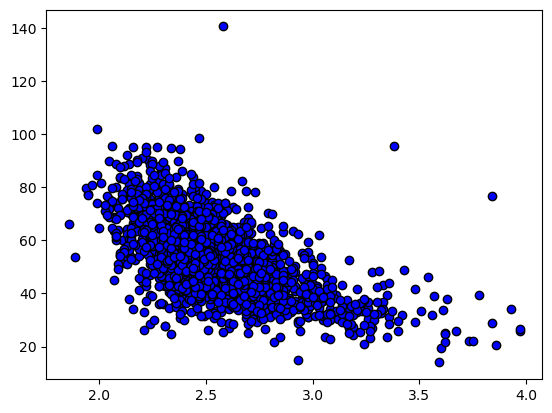

In [10]:
# Since average household size has moderate negative correlation to incidence and death rate, wanted to see the scatterplot
plt.scatter(df_combined['avghouseholdsize'], df_combined['actincidencerate'], marker="o", facecolors="blue", edgecolors="black")
plt.show()

In [11]:
# Putting all the column names I was assigned to analyze in lists
my_educ_cols = ['pcths18_24', 'pctnohs18_24', 'pctsomecol18_24', 'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over']
my_income_cols = ['medincome', 'povertypercent']
my_empl_cols = ['pctemployed16_over', 'pctunemployed16_over']
my_master_cols = ['popest2015', 'avganncount', 'avgdeathsperyear', 'actincidencerate', 'actdeathrate']
df_combined[my_master_cols + my_income_cols].corr()

,popest2015,avganncount,avgdeathsperyear,actincidencerate,actdeathrate,medincome,povertypercent
popest2015,1.000000,0.981322,0.977250,-0.184675,-0.243105,0.242759,-0.076325
avganncount,0.981322,1.000000,0.996993,-0.137890,-0.214173,0.256421,-0.093293
avgdeathsperyear,0.977250,0.996993,1.000000,-0.134649,-0.199539,0.232073,-0.080440
actincidencerate,-0.184675,-0.137890,-0.134649,1.000000,0.834953,-0.278655,-0.003797
actdeathrate,-0.243105,-0.214173,-0.199539,0.834953,1.000000,-0.484419,0.196673
medincome,0.242759,0.256421,0.232073,-0.278655,-0.484419,1.000000,-0.791514
povertypercent,-0.076325,-0.093293,-0.080440,-0.003797,0.196673,-0.791514,1.000000


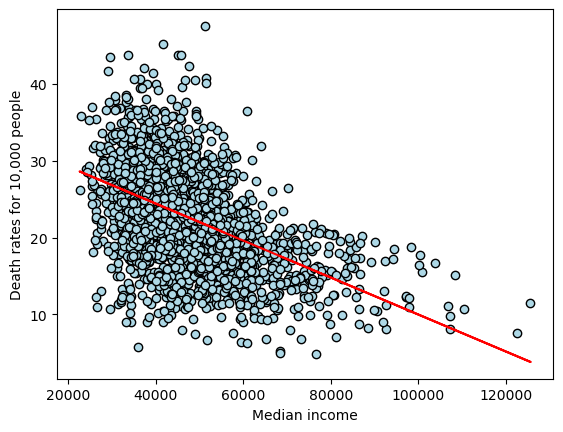

In [12]:
# Plot the linear regression between median income and the death rate
x_values = df_combined['medincome'].dropna()
y_values = df_combined['actdeathrate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Median income')
plt.ylabel('Death rates for 10,000 people')
plt.show()

## Q1: Is there a relationship between cancer incidence and death rates AND income or poverty level?
1. There is moderate negative correlation between death rate and median income (-0.484419).
1. There is small positive correlation between poverty percent and death rate (0.196673).
### Conclusions:
* Populations that have higher median income will see fewer deaths due to cancer.

In [13]:
df_combined[my_master_cols + my_empl_cols].corr()

,popest2015,avganncount,avgdeathsperyear,actincidencerate,actdeathrate,pctemployed16_over,pctunemployed16_over
popest2015,1.000000,0.981322,0.977250,-0.184675,-0.243105,0.155825,0.039190
avganncount,0.981322,1.000000,0.996993,-0.137890,-0.214173,0.155406,0.046590
avgdeathsperyear,0.977250,0.996993,1.000000,-0.134649,-0.199539,0.143695,0.056539
actincidencerate,-0.184675,-0.137890,-0.134649,1.000000,0.834953,-0.256233,-0.008978
actdeathrate,-0.243105,-0.214173,-0.199539,0.834953,1.000000,-0.422682,0.095523
pctemployed16_over,0.155825,0.155406,0.143695,-0.256233,-0.422682,1.000000,-0.633817
pctunemployed16_over,0.039190,0.046590,0.056539,-0.008978,0.095523,-0.633817,1.000000


## Q2: Is there a relationship between cancer incidence and death rates AND employment?
1. There is moderate negative correlation between death rate and percent employed 16 and over (-0.422682).
1. There is small negative correlation between incidence rate and percent employed 16 and over (-0.256233).
### Conclusions:
* Populations that have higher percentage of employment in ages 16 and over will have fewer deaths due to cancer.

In [14]:
# Is there a relationship between cancer incidence and death rates
# AND educational level?
df_combined[my_master_cols + my_educ_cols].corr()

,popest2015,avganncount,avgdeathsperyear,actincidencerate,actdeathrate,pcths18_24,pctnohs18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over
popest2015,1.000000,0.981322,0.977250,-0.184675,-0.243105,-0.161725,-0.131032,0.097481,0.259734,-0.314834,0.302023
avganncount,0.981322,1.000000,0.996993,-0.137890,-0.214173,-0.168164,-0.146029,0.105684,0.286953,-0.312100,0.316434
avgdeathsperyear,0.977250,0.996993,1.000000,-0.134649,-0.199539,-0.162539,-0.142050,0.102656,0.273131,-0.299660,0.299379
actincidencerate,-0.184675,-0.137890,-0.134649,1.000000,0.834953,0.181947,0.041062,-0.199665,-0.109741,0.411934,-0.273128
actdeathrate,-0.243105,-0.214173,-0.199539,0.834953,1.000000,0.263231,0.157252,-0.300620,-0.259147,0.531208,-0.473654
pcths18_24,-0.161725,-0.168164,-0.162539,0.181947,0.263231,1.000000,0.087885,-0.771819,-0.380368,0.441129,-0.403451
pctnohs18_24,-0.131032,-0.146029,-0.142050,0.041062,0.157252,0.087885,1.000000,-0.657795,-0.392709,0.225025,-0.398754
pctsomecol18_24,0.097481,0.105684,0.102656,-0.199665,-0.300620,-0.771819,-0.657795,1.000000,0.255188,-0.380780,0.428996
pctbachdeg18_24,0.259734,0.286953,0.273131,-0.109741,-0.259147,-0.380368,-0.392709,0.255188,1.000000,-0.395473,0.609189
pcths25_over,-0.314834,-0.312100,-0.299660,0.411934,0.531208,0.441129,0.225025,-0.380780,-0.395473,1.000000,-0.743755


## Q2: Is there a relationship between cancer incidence and death rates AND educational level?
1. The average number of cancer cases have an extremely weak negative correlation with higher education.  For example, the 3 columns "Some College 18-24 %", "Bachelor Degree 18-24 %" and "Bachelor Degree 25 and Over %" all show a negative correlation to cancer incidence rate, though they are extremely weak correlations.

1. The average number of deaths has a moderate negative correlation (-0.448336) with "Bachelor Degree 25 and Over %" and a moderate positive correlation (0.487745) with "High School 25 and Over %".
### Conclusions:
* Populations that have a greater percentage of people over 25 with a Bachelor's degree will see lower percentage of cancer deaths.  The reverse is also moderately true. Populations that have a greater percentage of people over 25 with only a high school degree will see higher percentage of cancer deaths.

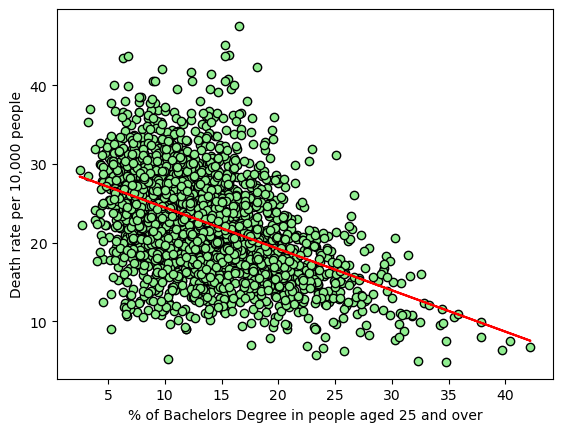

In [15]:
# Check out the linear regression between Bachelor's Degree for ages 25 and over and the death rate
x_values = df_combined['pctbachdeg25_over'].dropna()
y_values = df_combined['actdeathrate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="lightgreen", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="blue")
plt.xlabel('% of Bachelors Degree in people aged 25 and over')
plt.ylabel('Death rate per 10,000 people')
plt.show()

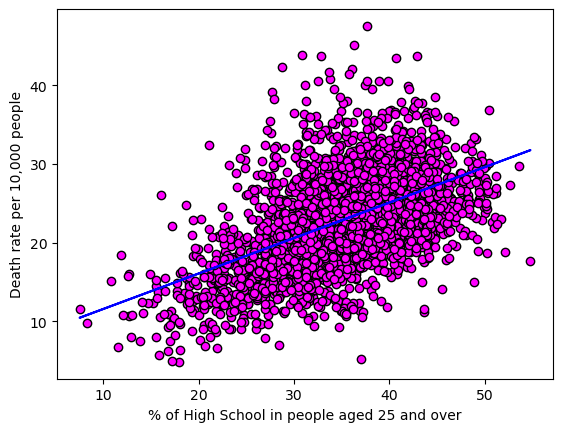

In [16]:
# Check out the linear regression between High School for ages 25 and over and the death rate
x_values = df_combined['pcths25_over'].dropna()
y_values = df_combined['actdeathrate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="magenta", edgecolors="black")
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15)
plt.xlabel('% of High School in people aged 25 and over')
plt.ylabel('Death rate per 10,000 people')
plt.show()

In [17]:
# Group by state
df_groupbystate = df_combined.groupby(['state'])

In [18]:
# Get the average death rate by state and sort it in ascending order
df_deathrate_bystate = df_groupbystate['actdeathrate'].mean().sort_values(ascending=True)
df_deathrate_bystate

state
Utah                    12.451186
Alaska                  13.608635
District of Columbia    16.125481
Hawaii                  16.556735
Colorado                16.977506
California              18.225865
Wyoming                 18.574856
Arizona                 18.619155
Idaho                   18.707330
Connecticut             19.154142
New Jersey              19.723839
Massachusetts           20.243911
Maryland                20.544238
Georgia                 20.546576
New Mexico              20.627575
Delaware                20.899980
Texas                   21.113291
Washington              21.242004
New York                21.524134
Louisiana               21.787124
Rhode Island            22.044777
New Hampshire           22.177373
Montana                 22.351608
North Carolina          22.375525
South Carolina          22.406394
Indiana                 22.609445
Vermont                 22.834502
Virginia                23.053381
Ohio                    23.139548
South Da

In [19]:
# Get the average incidence rate by state and sort it in ascending order
df_incidencerate_bystate = df_groupbystate['actincidencerate'].mean().sort_values(ascending=True)
df_incidencerate_bystate

state
Alaska                  34.720834
Utah                    36.077048
Arizona                 42.504076
District of Columbia    42.857483
Colorado                45.011148
Hawaii                  45.731528
Texas                   47.496124
Wyoming                 47.597351
California              48.435791
New Mexico              49.580725
Georgia                 50.345001
Idaho                   50.744283
Maryland                52.980122
South Carolina          53.275443
Louisiana               53.398006
Indiana                 53.421709
Mississippi             53.446187
Oklahoma                53.454003
Washington              53.800055
Virginia                54.193930
Ohio                    54.249672
Missouri                55.542639
Florida                 55.614565
Alabama                 55.983879
Arkansas                56.441330
North Carolina          56.481294
Connecticut             56.552558
New Jersey              56.636459
Delaware                57.068865
Massachu

In [20]:
# Get the total population by state and sort it in ascending order.
df_population_bystate = df_groupbystate['popest2015'].sum().sort_values(ascending=True)

# Begin concatenating population and its rank together for a statewise analysis.
df_state_ranked = pd.concat([df_population_bystate, df_population_bystate.rank(ascending=True)], axis=1)
df_state_ranked.head(3)

,popest2015,popest2015
state,,
Puerto Rico,0.0,1.5
Kansas,0.0,1.5
Wyoming,586107.0,3.0


In [21]:
# Concatenate cancer incidence and its rank to population.
df_state_ranked = pd.concat([df_state_ranked, df_incidencerate_bystate], axis=1)
df_state_ranked = pd.concat([df_state_ranked, df_incidencerate_bystate.rank(ascending=True)], axis=1)
df_state_ranked.head(3)

,popest2015,popest2015,actincidencerate,actincidencerate
state,,,,
Puerto Rico,0.0,1.5,NaN,NaN
Kansas,0.0,1.5,NaN,NaN
Wyoming,586107.0,3.0,47.597351,8.0


In [22]:
# Finally, concatenate cancer deaths and its rank.
df_state_ranked = pd.concat([df_state_ranked, df_deathrate_bystate], axis=1)
df_state_ranked = pd.concat([df_state_ranked, df_deathrate_bystate.rank(ascending=True)], axis=1)
df_state_ranked.head(3)

,popest2015,popest2015,actincidencerate,actincidencerate,actdeathrate,actdeathrate
state,,,,,,
Puerto Rico,0.0,1.5,NaN,NaN,NaN,NaN
Kansas,0.0,1.5,NaN,NaN,NaN,NaN
Wyoming,586107.0,3.0,47.597351,8.0,18.574856,7.0


In [23]:
# Rename columns to make them readable and drop blank data rows
df_state_ranked.columns = ['Population', 'PopulationRank', 'IncidenceRate', 'IncidenceRank', 'DeathRate', 'DeathRank']
df_state_ranked = df_state_ranked.dropna()
df_state_ranked

,Population,PopulationRank,IncidenceRate,IncidenceRank,DeathRate,DeathRank
state,,,,,,
Wyoming,586107.0,3.0,47.597351,8.0,18.574856,7.0
Vermont,626042.0,4.0,60.703831,41.0,22.834502,27.0
District of Columbia,672228.0,5.0,42.857483,4.0,16.125481,3.0
Alaska,706895.0,6.0,34.720834,1.0,13.608635,2.0
North Dakota,755224.0,7.0,58.898059,35.0,24.091679,36.0
South Dakota,834213.0,8.0,57.237580,32.0,23.216839,30.0
Delaware,945934.0,9.0,57.068865,29.0,20.899980,16.0
Montana,1002788.0,10.0,59.872687,37.0,22.351608,23.0
Rhode Island,1056298.0,11.0,59.962428,38.0,22.044777,21.0


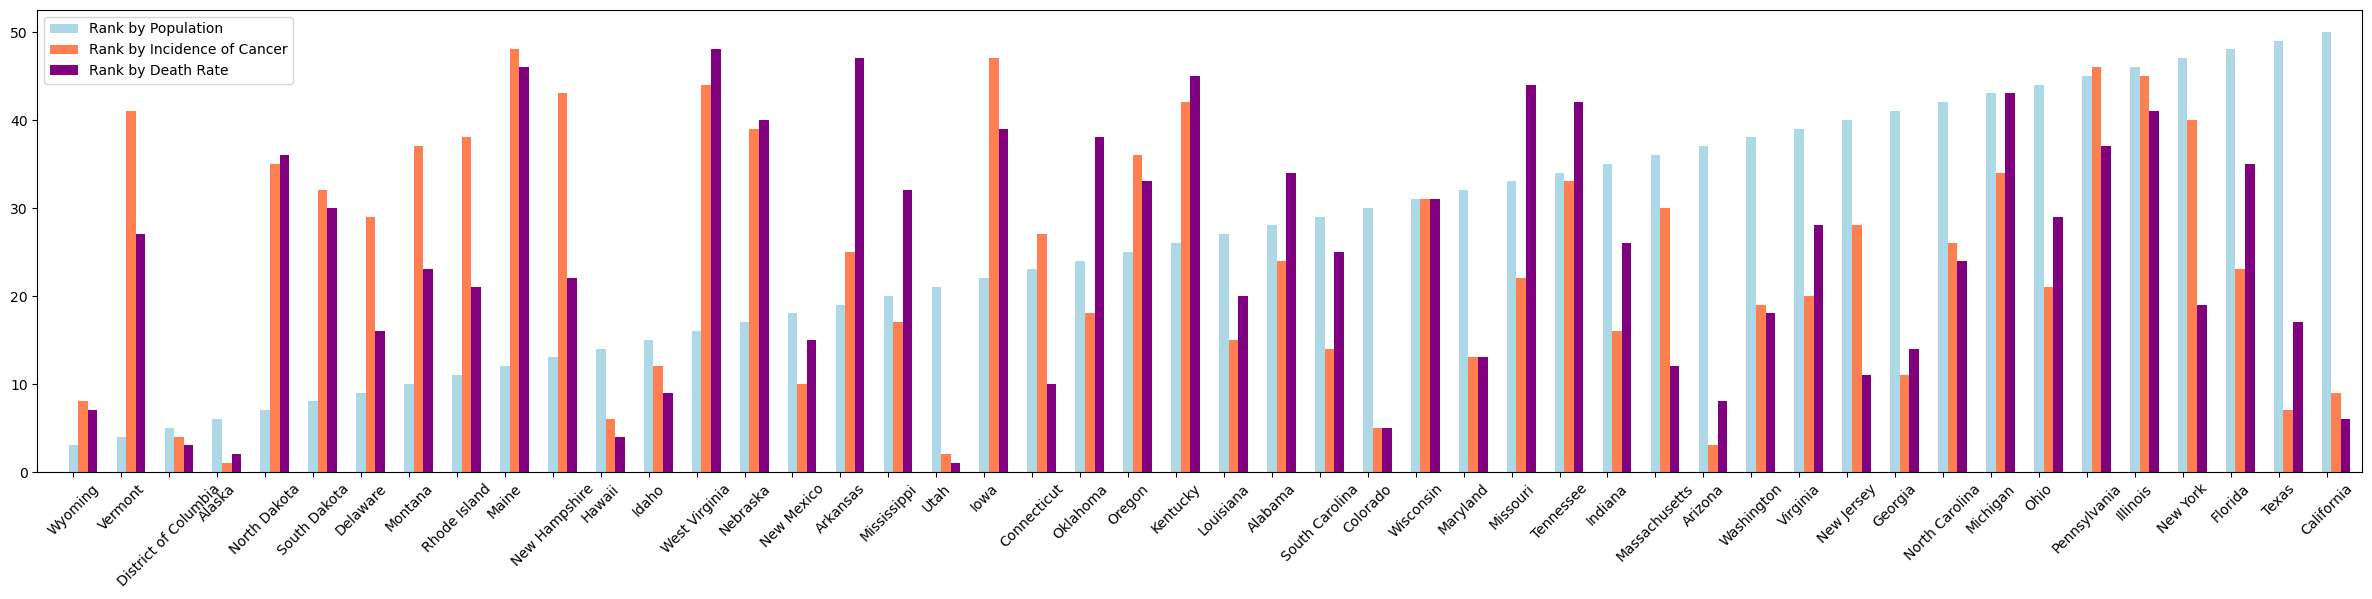

In [24]:
# Plot ranks using a multiple bar graph
bar1 = np.arange(len(df_state_ranked.index))
bar2 = [x + 0.2 for x in bar1] 
bar3 = [x + 0.2 for x in bar2]

plt.figure(figsize=(30,6))
plt.bar(bar1, df_state_ranked['PopulationRank'], width=0.2, color='lightblue', label = 'Rank by Population')
plt.bar(bar2, df_state_ranked['IncidenceRank'], width=0.2, color='coral', label = 'Rank by Incidence of Cancer')
plt.bar(bar3, df_state_ranked['DeathRank'], width=0.2, color='purple', label = 'Rank by Death Rate')
plt.xticks(np.arange(len(df_state_ranked.index)), labels=df_state_ranked.index, rotation=45)
plt.legend()
plt.xlim(-0.75, len(df_state_ranked.index)-0.25)
plt.show()

In [25]:
# Write out the csv showing state-wise ranks for Population, Cancer Incidence and Cancer Death rates.
df_state_ranked.to_csv("Resources/StateRanks.csv", index=True, header=True)

## For future analysis, I recommend the following:
* Find cancer incidence and death rates by date, week or month across a few years for each state in the US. Use this data and Prophet to do a predictive analysis for a few months into the future.
* Find more granular educational data, for example, no high school, only high school, some college, bachelor degree, master degree, phd for each state and check correlation between all levels of education with cancer incidence and death rates.